#**Image Segmentation**<br>


**Aim** : To implement object detection on an image via image segmentation.

**Theory :** Image segmentation is a commonly used technique in digital image processing and analysis to partition an image into multiple parts or regions, often based on the characteristics of the pixels in the image.<br>
Images segmentation is an important step of objects recognizing in computer vision domain.<br>
Image labeling in image segmentation gives you insight into the content of images.<br>
Some of the methods used in Image Segmentation are Thresholding Segmentation, Edge based Segmentation and Region Segmentation.<br>
The goal of Object Counting task is to count the number of object instances in a single image or video sequence.

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import cv2

**1: Preprocessing**

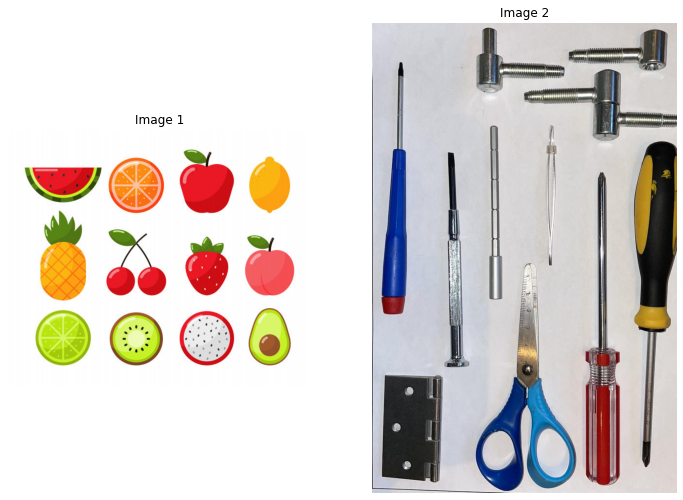

In [ ]:
#Loading the images

img = io.imread("img.jpg")
img2 = io.imread("image.jpg")

plt.figure(figsize = (12,12)) # image height and width in inches

plt.subplot(121) # creates a figure and a grid of subplots with a single call
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title('Image 1')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.title('Image 2')
plt.axis('off') # removes the x and y axis
plt.show() # display's the image

We have converted our colored images to grayscale images in order to have only one channel image.<br>
We have used Gamma correction which resolves all clearness problem.

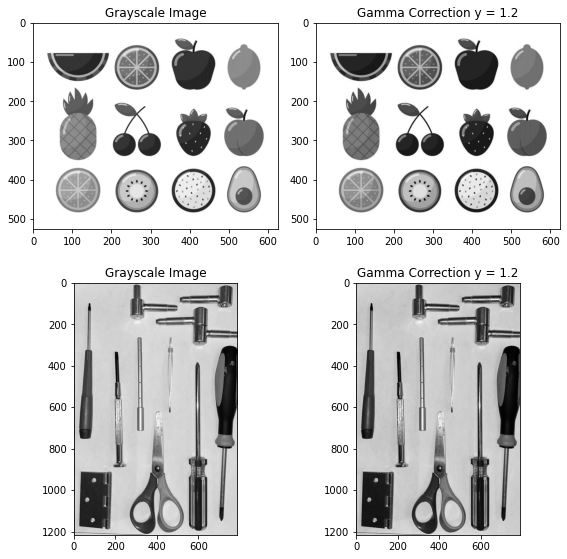

In [ ]:
# Convert image in grayscale
gray_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Contrast adjusting with gamma correction y = 1.2
gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
gray_correct2 = np.array(255 * (gray_im2 / 255) ** 1.2 , dtype='uint8')

plt.figure(figsize = (8,8))

plt.subplot(221)
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)
plt.title('Grayscale Image')

plt.subplot(222)
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
plt.title('Gamma Correction y = 1.2')

plt.subplot(223)
plt.imshow(gray_im2, cmap="gray", vmin=0, vmax=255)
plt.title('Grayscale Image')

plt.subplot(224)
plt.imshow(gray_correct2, cmap="gray", vmin=0, vmax=255)
plt.title('Gamma Correction y = 1.2')
plt.tight_layout()


 **2 : Processing**

We have used the adaptive local threshold technique to binarize our grayscale image i.e to convert an image consisting of gray scale pixels to just black and white scale pixels.<br>
Usually a pixel value of 0 represents white and the value 255 represents black with the numbers from 1 to 254 representing different gray levels.<br>

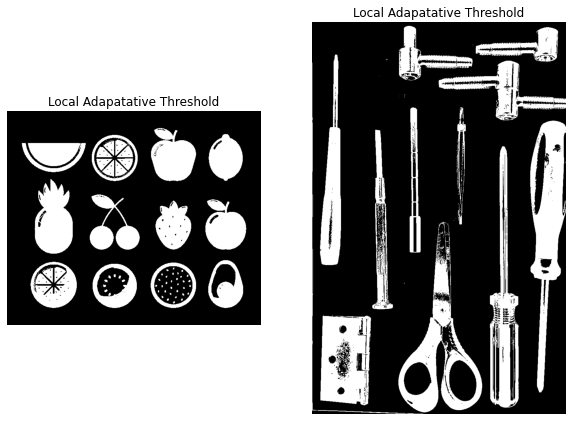

In [ ]:
# Local Adaptative Threshold

thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
thresh = cv2.bitwise_not(thresh)

thresh2 = cv2.adaptiveThreshold(gray_correct2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
thresh2 = cv2.bitwise_not(thresh2)

plt.figure(figsize = (10,10))

plt.subplot(121)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.title('Local Adapatative Threshold')
plt.axis('off')

plt.subplot(122)
plt.imshow(thresh2, cmap="gray", vmin=0, vmax=255)
plt.title('Local Adapatative Threshold')
plt.axis('off') # removes the x and y axis
plt.show()

We will follow the erosion and dilation techniques which will help us to connected nearest regions in order to have one region per object.

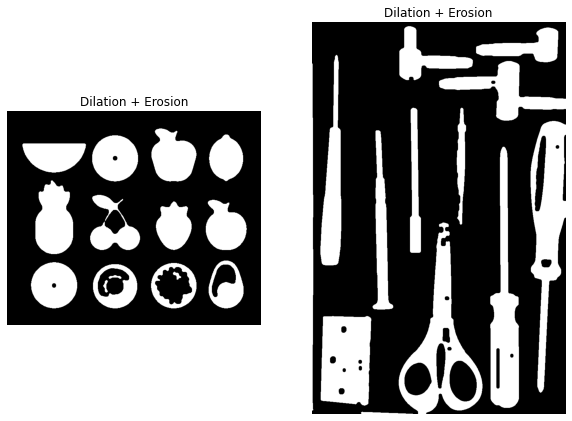

In [ ]:
# Dilation and erosion
objects = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(thresh, objects, iterations=1)
img_erode = cv2.erode(img_dilation,objects, iterations=1)

# Clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

# Dilation and erosion
objects2 = np.ones((10,10), np.uint8)
img_dilation2 = cv2.dilate(thresh2, objects2, iterations=1)
img_erode2 = cv2.erode(img_dilation2,objects2, iterations=1)

# Clean all noise after dilatation and erosion
img_erode2 = cv2.medianBlur(img_erode2, 7)

plt.figure(figsize = (10,10))

plt.subplot(121)
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.title('Dilation + Erosion')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_erode2, cmap="gray", vmin=0, vmax=255)
plt.title('Dilation + Erosion')
plt.axis('off') #removes the x and y axis
plt.show()

As we have one object per connected region, so we can count number of objects in the image.<br>But before doing that, we will label the connected regions.

In [ ]:
# Labeling the images

ret, labels = cv2.connectedComponents(img_erode) # assigning a unique label
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0 # setting the background label to black

ret2, labels2 = cv2.connectedComponents(img_erode2)
label_hue2 = np.uint8(179 * labels2 / np.max(labels2))
blank_ch = 255 * np.ones_like(label_hue2)
labeled_img2 = cv2.merge([label_hue2, blank_ch, blank_ch])
labeled_img2 = cv2.cvtColor(labeled_img2, cv2.COLOR_HSV2BGR)
labeled_img2[label_hue2 == 0] = 0

**Final Image 1 : Output with the number of objects counted.**

Objects Counted are : 14


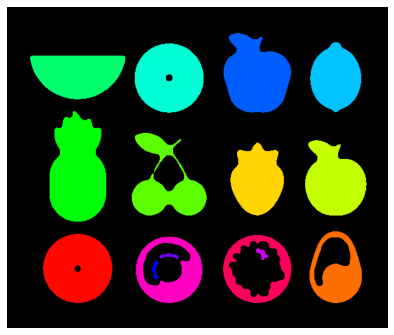

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(222)
plt.imshow(labeled_img)
print('Objects Counted are :', ret-2)
plt.axis('off')
plt.show()

**Final Image 2 : Output with the number of objects counted.**

Objects Counted are : 12


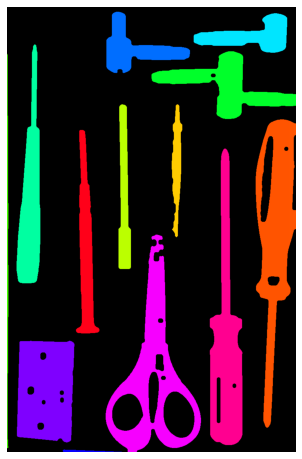

In [ ]:
plt.figure(figsize = (18,18))
plt.subplot(222)
plt.imshow(labeled_img2)
print('Objects Counted are :', ret2-2)
plt.axis('off')
plt.show()

**Result and Analysis :** Object counting in an image is one of the major challenges in image processing. Image segmentation is used to segregate similar particles which help counting approximate total number of particles.<br>Thresholding technique is needed for counting objects in an image. Counting only with thresholding technique can give wrong impression.<br>
So using Labeling and objects counting along with thresholding technique gives satisfactory result.<br>
An attempt is made to count the number of objects in the two images using various image segmentation methods.<br>

Image processing techniques are helpful for object counting and reduce the time of counting effectively.<br>
We have applied the image segmentation methods on two images to compare and check <br>
whether the objects detected, labelling done with different hue colours and the calculated proper recognition object count are accurate or not.<br>
The accuracy of the algorithm depends on camera used, size of objects, whether or not objects touching and illumination conditions.


**Conclusion :** A summary of all the steps applied on the images using different segmentation methods.
1. Firstly, we selected two images and converted them to gray scale.
2. We then used Gamma Correction to solve the clearness problem.
2. For processing the image, we used the local adaptive threshold segmentation method.<br>
4. Applied Erosion and Dilation to connect the nearest region in order to have a region per object.
4. Lastly, we labelled the image and then calculated the object count.<br>